In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.stats import gaussian_kde

In [2]:
dataset_path = Path("../interpolation_dataset")
dataset_files = [f for f in dataset_path.glob("neighborhoods/*.npy")]
print(len(dataset_files))


1175701


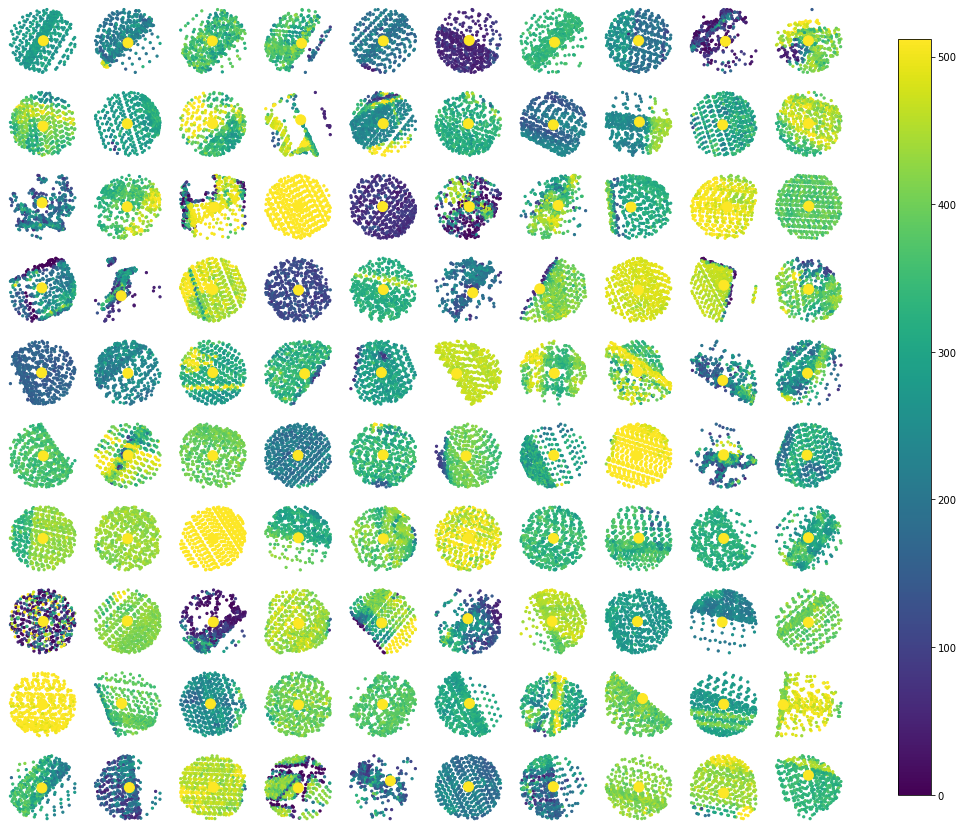

In [3]:
# perhaps it is worth it throw out samples if the center is not actually the center

x = 10
y = 10
matplotlib.rcParams['figure.figsize'] = [x*1.5, y*1.5]
fig, ax = plt.subplots(y, x)
for i in range(y):
    for j in range(x):
        example = np.load(dataset_files[i*10 + j], allow_pickle=True)
        # Adjust the gt-center to be more visible
        # Adjust the gt-center to be more visible
        center = np.ones((example.shape[0])) * 5
        center[0] = 100
        intensity = example[:, 3]
        intensity[0] = 512
        s = ax[i][j].scatter(np.flip(example[:, 0]), 
                             np.flip(example[:, 1]), 
                             s=np.flip(center), 
                             c=np.flip(example[:, 3]), 
                             vmin=0, 
                             vmax=512)
        ax[i][j].axis('off')


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()



1175701


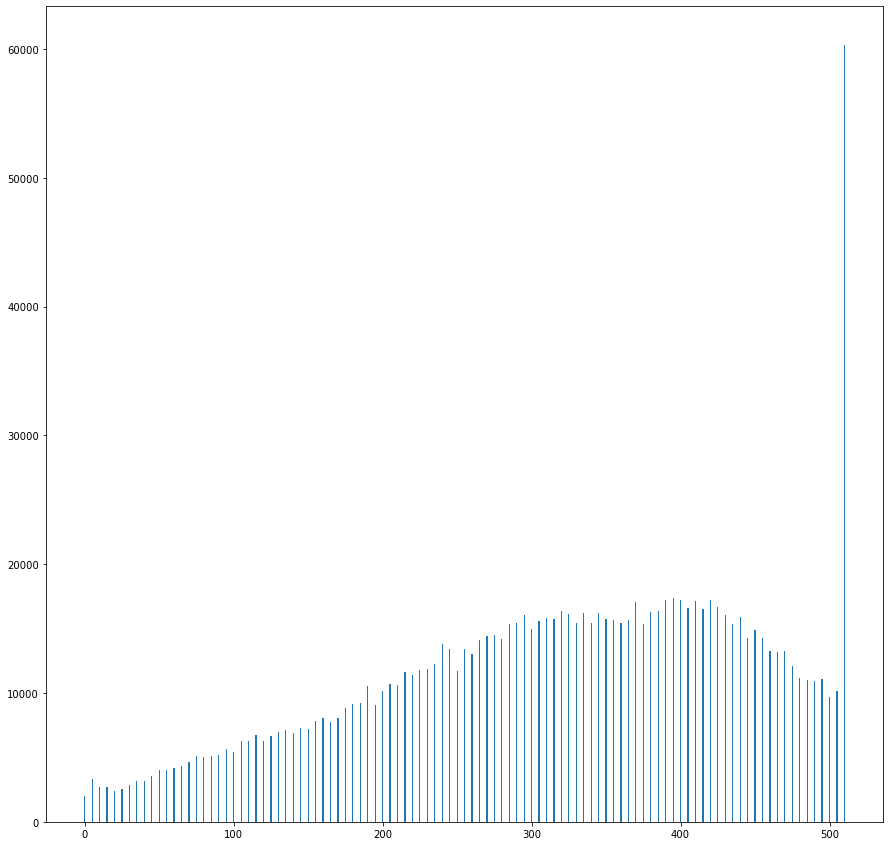

In [4]:
# Target intensity class balance 
bins = [b for b in range(0, 515, 5)]
bin_chart = {b : 0 for b in bins}
count = 0
for i in range(len(dataset_files)):
    example = np.load(dataset_files[i])
    center_i = example[0, 3]
    bin_chart[(int(center_i)//5)*5] += 1
    count += 1

print(count)
    
# print(bin_chart)
plt.bar(bin_chart.keys(), bin_chart.values())
plt.show()

In [5]:
# print(bins)
counts = np.array(list(bin_chart.values()))
# print(counts)
count_sort = np.argsort(counts, axis=0)
# print(count_sort)

# find average 
print(counts)
mean = np.mean(counts[:101])
print(mean)
print (counts.sum())

[ 2032  3308  2737  2678  2427  2578  2889  3202  3175  3531  4044  4046
  4206  4358  4623  5133  5002  5127  5213  5680  5423  6285  6287  6705
  6243  6681  6935  7114  6929  7311  7204  7851  8089  7771  8074  8864
  9181  9186 10514  9095 10143 10701 10622 11597 11370 11771 11891 12277
 13840 13401 11745 13384 12991 14090 14411 14503 14159 15320 15440 16040
 15006 15619 15843 15778 16370 16105 15468 16187 15457 16173 15734 15704
 15450 15636 17035 15346 16325 16367 17220 17342 17204 16596 17106 16545
 17233 16666 16028 15343 15929 14256 14854 14271 13241 13193 13278 12063
 11131 11026 10930 11121  9664 10136 60295]
10943.267326732674
1175701


   Unnamed: 0                                           examples  flight_num
0           0  /home/david/bin/python/intensity/src/dataset/i...          10
1           1  /home/david/bin/python/intensity/src/dataset/i...          10
2           2  /home/david/bin/python/intensity/src/dataset/i...          39
3           3  /home/david/bin/python/intensity/src/dataset/i...           9
4           4  /home/david/bin/python/intensity/src/dataset/i...          28
720691


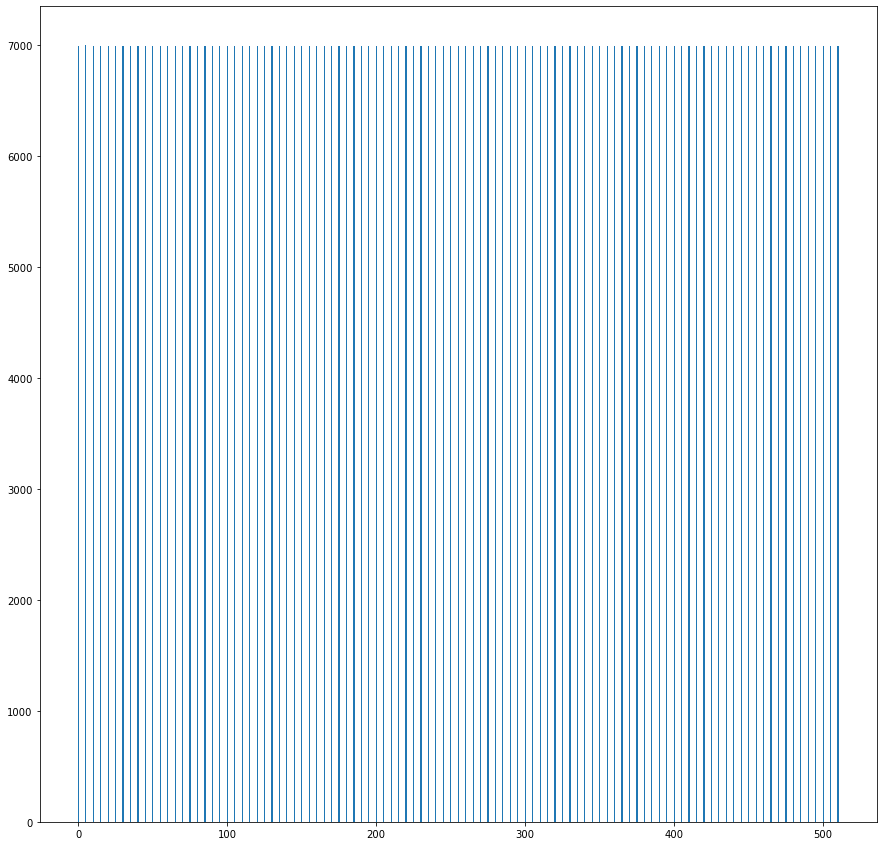

In [6]:
df = pd.read_csv(dataset_path / "train_dataset.csv")
print(df.head())

# Target intensity class balance 
bins = [b for b in range(0, 515, 5)]
bin_chart = {b : 0 for b in bins}
count = 0
for i in range(len(df)):
    example = np.load(df.iloc[i]["examples"])
    center_i = example[0, 3]
    bin_chart[(int(center_i)//5)*5] += 1
    count += 1

print(count)
    
plt.bar(bin_chart.keys(), bin_chart.values())
plt.show()